# Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing: Handling Missing Values and Encoding Categorical Data

In [2]:
# Check for missing values
df.isnull().sum()

# Encode the 'Gender' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Feature Selection and Standardization

In [3]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering: Determining Optimal Number of Clusters (Elbow Method)

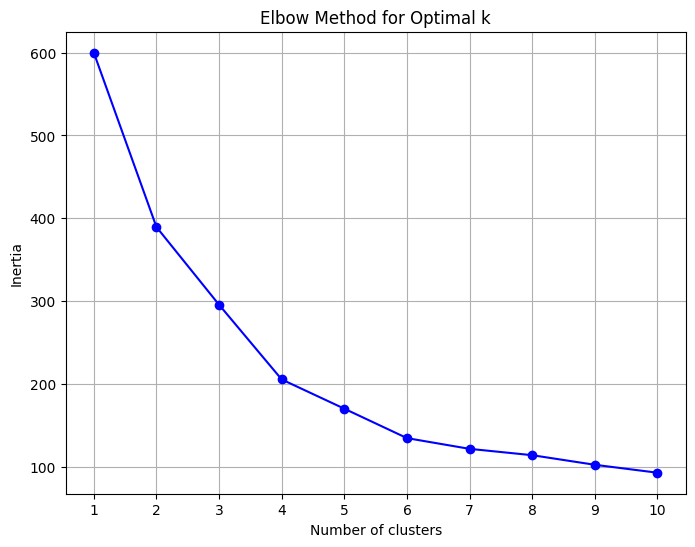

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

# Calculate inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# K-Means Clustering: Applying the Model and Visualization

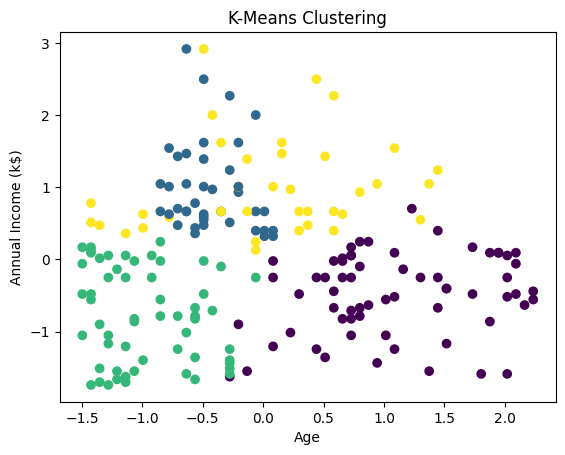

In [5]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['KMeans_Labels'] = kmeans_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# DBSCAN Clustering

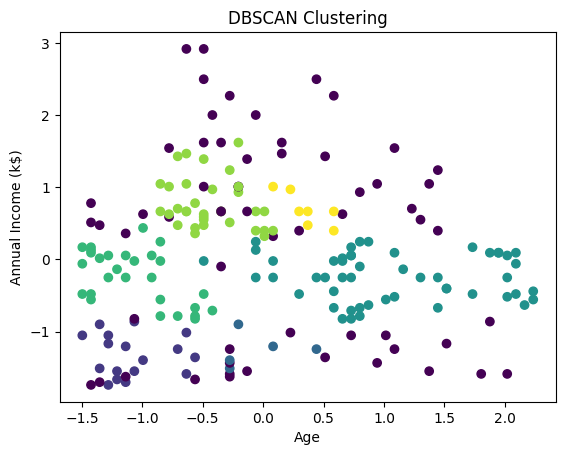

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['DBSCAN_Labels'] = dbscan_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Hierarchical Clustering

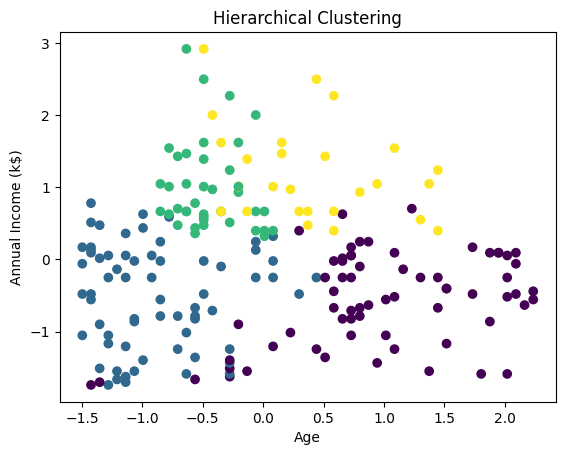

In [7]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['HC_Labels'] = hc_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels)
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# Evaluation: Silhouette Scores for Clustering Algorithms

In [8]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
hc_silhouette = silhouette_score(X_scaled, hc_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette}')

K-Means Silhouette Score: 0.4039582785148566
DBSCAN Silhouette Score: 0.18451372756506046
Hierarchical Clustering Silhouette Score: 0.3614512741691407
